<h1 align=right><span style='font-family:Arial Black'>Henry</span></h1>
<p><img src="formas/EDA.jpg", width="250"></p>

# EDA: *`Exploración y análisis de datos:`*
> **Objetivo EDA:** `Explorar y analizar los datos del dataset de trabajo para crear el insumo de mis endpoints y obtener la mas acertada interacción entre las variables para obtener el mejor resultado posible.`

In [1]:
# Aquí, importamos todas las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## *`Analizando los datos para crear el insumo de mis endpoints`*

In [2]:
# Abrimos el archivo de trabajo que mandamos a folder data
df = pd.read_csv('../data/df_trabajo.csv')
df.head(2)

,user_id,item_id,playtime_forever,sentiment_analysis,recommend,review,posted_year,title,id,release_year,genero
0,76561197970982479,22200,271,1,True,It's unique and worth a playthrough.,2011,Lost Summoner Kitty,761140.0,2018,Casual
1,76561197970982479,1250,10006,1,True,Simple yet with great replayability. In my opi...,2011,Lost Summoner Kitty,761140.0,2018,Action


In [3]:
# Para esto, verificamos la cantidad de registros y columnas
df.shape

(43863, 11)

In [4]:
# Encontrándose 11 columnas y 43863 registros.
# Y todos los tipos de dato en su lugar, sin datos nulos.
# Entonces, partimos este proceso EDA con dataset limpio.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43863 entries, 0 to 43862
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             43863 non-null  object 
 1   item_id             43863 non-null  int64  
 2   playtime_forever    43863 non-null  int64  
 3   sentiment_analysis  43863 non-null  int64  
 4   recommend           43863 non-null  bool   
 5   review              43863 non-null  object 
 6   posted_year         43863 non-null  int64  
 7   title               43863 non-null  object 
 8   id                  43863 non-null  float64
 9   release_year        43863 non-null  int64  
 10  genero              43863 non-null  object 
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 3.4+ MB


### `Para el primer endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['genero','release_year','playtime_forever']]`

In [5]:
# Sin embargo, 'df.playtime_forever' está en 'minutos', así que vamos a crear
# la columna 'df.playtime_hours' en 'horas'
df['playtime_hours'] = df['playtime_forever']/60

In [6]:
# Vemos que ahora tenemos 12 columnas y los mismos 43863 registros
# y aparece la columna 'playtime_hours'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43863 entries, 0 to 43862
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             43863 non-null  object 
 1   item_id             43863 non-null  int64  
 2   playtime_forever    43863 non-null  int64  
 3   sentiment_analysis  43863 non-null  int64  
 4   recommend           43863 non-null  bool   
 5   review              43863 non-null  object 
 6   posted_year         43863 non-null  int64  
 7   title               43863 non-null  object 
 8   id                  43863 non-null  float64
 9   release_year        43863 non-null  int64  
 10  genero              43863 non-null  object 
 11  playtime_hours      43863 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 3.7+ MB


In [7]:
# Ahora en el archivo df, necesitamos las columnas: 'genero','release_year','playtime_hours'
# para generar nuestro dataset 'genero.csv'
genero = df[['genero','release_year','playtime_hours']].groupby(['release_year','genero']).count().sort_values(by='playtime_hours',ascending=False)
genero.reset_index(inplace=True)
genero.head()

,release_year,genero,playtime_hours
0,2017,Indie,3861
1,2016,Indie,2653
2,2017,Action,2413
3,2017,Casual,2014
4,2017,Adventure,1928


In [8]:
#genero.to_csv('genero.csv',index=False)

### `Para el segundo endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['genero','posted_year','user_id','playtime_hours']]`

In [9]:
# De el dataset df, necesitamos las columnas: 'genero','posted_year','user_id','playtime_forever'
# para generar nuestro dataset:'userforgenre.csv'
gene = df[['genero','posted_year','user_id','playtime_hours']].groupby(['posted_year','genero','user_id']).sum()
gene.reset_index(inplace=True)
gene

,posted_year,genero,user_id,playtime_hours
0,2010,Action,76561197995098683,107.950000
1,2010,Action,AzzX,77.083333
2,2010,Action,ToxWolf,182.466667
3,2010,Action,bigodo,139.666667
4,2010,Action,farsel,2.166667
...,...,...,...,...
39566,2023,Web Publishing,lutzayy,2.550000
39567,2023,Web Publishing,martiantrain,8.000000
39568,2023,Web Publishing,sandw1ch,2.916667
39569,2023,Web Publishing,thecompl3x,1065.016667


In [10]:
#gene.to_csv('userforgenre.csv',index=False)

### `Para el tercer endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['recommend','posted_year','sentiment_analysis','title']]`

In [11]:
# De el archivo 'df', necesitamos las columnas:'sentiment_analysis', 'recommend', 'posted_year','title', 
# se creara el dataset de trabajo: 'UsersRecommend.csv'
rec = df[df.recommend==True][['posted_year','sentiment_analysis','title']].groupby(['posted_year','title']).count().sort_values(by='sentiment_analysis',ascending=False)
rec.reset_index(inplace=True)
rec

,posted_year,title,sentiment_analysis
0,2014,VAULT OF HONOR,10
1,2015,M.EXE,9
2,2023,Still Not Dead,9
3,2015,Expect The Unexpected,8
4,2015,Dungeon Rushers: Crawler RPG,8
...,...,...,...
28416,2014,Post Apocalyptic Mayhem: DLC - Chaos Pack,1
28417,2014,Poseidon - Project Dark Sky,1
28418,2014,Portal Knights,1
28419,2014,Portal 2,1


In [12]:
#rec.to_csv('UsersRecommend.csv',index=False)

### `Para el cuarto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['recommend','posted_year','sentiment_analysis','title']]`

In [13]:
# De el archivo 'df', necesitamos las columnas:'sentiment_analysis', 'recommend', 'posted_year','app_name', 
# se creara el dataset de trabajo: 'UsersNotRecommend.csv'
reco = df[df.recommend==False][['posted_year','sentiment_analysis','title']].groupby(['posted_year','title']).count().sort_values(by='sentiment_analysis',ascending=False)
reco.reset_index(inplace=True)
reco

,posted_year,title,sentiment_analysis
0,2014,Pixel Puzzles Ultimate - Puzzle Pack: Jigsaw,6
1,2014,Niffelheim,4
2,2023,EURGAVA™ - Fight for Haaria,4
3,2015,Melina (Character for Occult Raise),4
4,2023,Space Ripper,4
...,...,...,...
4450,2015,All Guns On Deck,1
4451,2015,All Haze Eve,1
4452,2015,Altar Guardian,1
4453,2015,Ambre - Original Soundtrack,1


In [14]:
#reco.to_csv('UsersNotRecommend.csv',index=False)

### `Para el quinto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['release_year','review','sentiment_analysis']]`

In [15]:
# De el archivo 'df', necesitamos las columnas:'release_year','review','sentiment_analysis',
# vamos a crear el dataset de trabajo: 'sentimientos.csv'
sent = df[['release_year','review','sentiment_analysis']]
sent.tail(10000)

,release_year,review,sentiment_analysis
33863,2016,"This game is plain awesome, there are so many ...",2
33864,2016,"VERY NICE, GREAT SUCCESS!",2
33865,2016,This game WILL reset your characters! Just had...,0
33866,2015,Really fun game with tons to explore and do! R...,2
33867,2015,First time playing this gameJoins serverAll I ...,2
...,...,...,...
43858,2018,Esse jogo é simplesmente muito ♥♥♥♥.... nunca ...,2
43859,2018,"Quer ser uma pessoa feliz? simples, Compre Gar...",2
43860,2018,Great game 10/10 xd xd,1
43861,2017,One of the best games out there.,2


In [16]:
#sent.tail(10000).to_csv('sentimientos.csv',index=False)

### `Para el sexto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `Aquí, no pude usar la función de la similitud del coseno.`
* `Entonces con ese mismo dataset conteniendo las columnas: title, id`
* `Usamos una función mas sencilla, para completar esa función`. 
* `df[['id','title']]`

In [17]:
# De el archivo 'df', necesitamos las columnas: 'title', 'id',
# vamos a crear el dataset del trabajo: 'recomendacion_juego.csv'
rec_juego = df[['id','title']]
rec_juego

,id,title
0,761140.0,Lost Summoner Kitty
1,761140.0,Lost Summoner Kitty
2,761140.0,Lost Summoner Kitty
3,761140.0,Lost Summoner Kitty
4,643980.0,Ironbound
...,...,...
43858,610660.0,Russian Roads
43859,610660.0,Russian Roads
43860,610660.0,Russian Roads
43861,658870.0,EXIT 2 - Directions


In [18]:
#rec_juego.to_csv('recomendacion_juego.csv',index=False)

### `Para el septimo endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['user_id','title']]`

In [19]:
# De el dataset 'df', tomamos las columnas: 'user_id','title',
# para crear el dataset de trabajo: 'recomendacion_usuario.csv'
rec_usuario = df[['user_id','title']]
rec_usuario

,user_id,title
0,76561197970982479,Lost Summoner Kitty
1,76561197970982479,Lost Summoner Kitty
2,76561197970982479,Lost Summoner Kitty
3,js41637,Lost Summoner Kitty
4,js41637,Ironbound
...,...,...
43858,76561198087196831,Russian Roads
43859,76561198087196831,Russian Roads
43860,76561198087216220,Russian Roads
43861,L3afBlower,EXIT 2 - Directions


In [20]:
#rec_usuario.to_csv('recomendacion_usuario.csv',index=False)

## *`Analizando los datos de mis variables numéricas`*

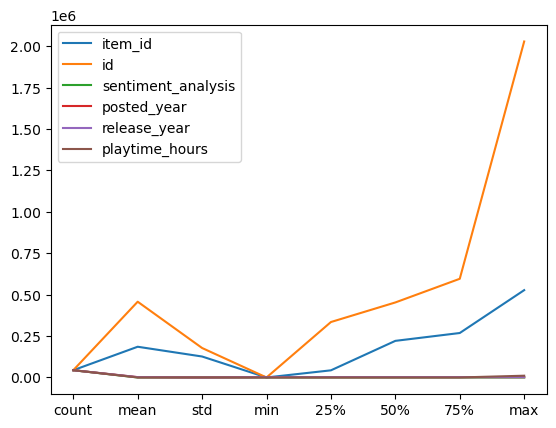

In [21]:
# Un gráfico de la parte estadística, nos muestra a detalle la interrelación de 
# 6 variables numéricas:
df[['item_id','id','sentiment_analysis','posted_year','release_year','playtime_hours']].describe().plot();

**Aqui se puede ver la alta similitud entre las variables:**
- *`sentiment_analysis, posted_year, release_year y playtime_hours`*

sentiment_analysis = 43863
sentiment_analysis(Negative) = 3856
sentiment_analysis(Neutral) = 27913
sentiment_analysis(Positive) = 12094
posted_year = 43863
release_year = 43863
playtime_hours = 43863


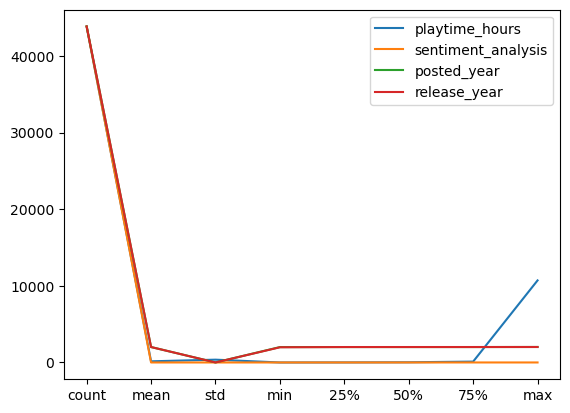

In [22]:
# Aquí tenemos un acercamiento y perspectiva de las variables anteriores
print('sentiment_analysis =', df.sentiment_analysis.count())
print('sentiment_analysis(Negative) =', df[df.sentiment_analysis==0].count()[0])
print('sentiment_analysis(Neutral) =', df[df.sentiment_analysis==1].count()[0])
print('sentiment_analysis(Positive) =', df[df.sentiment_analysis==2].count()[0])
print('posted_year =', df.posted_year.count())
print('release_year =', df.release_year.count())
print('playtime_hours =', df['playtime_hours'].count())
df[['playtime_hours','sentiment_analysis','posted_year','release_year']].describe().plot();

**Aqui lo mas fácil de constatar, jugando un poco con los datos, es:**
- *`La cantidad de reviews Neutrales en la columna de sentiment_analysis, siendo la más sobresaliente con 27913 registros`*

In [23]:
print('Representando un', int(round(27913/43863,2)*100),'% del total de registros:43863')

Representando un 64 % del total de registros:43863


Neutral = 27913
Positive = 12094
Negative =  3856


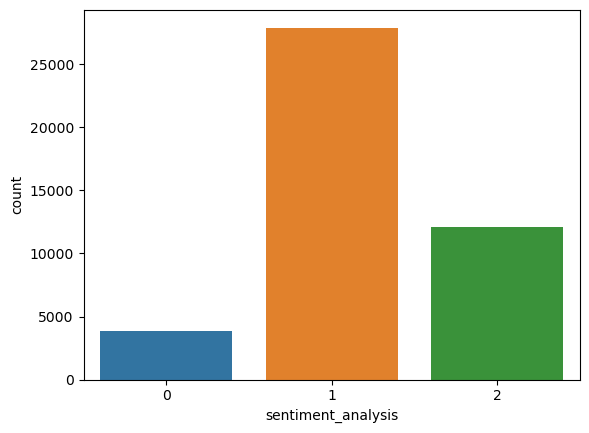

In [24]:
# Este gráfico, se presenta para mostrar el desglose de los parámetros de la columna 
# de 'sentiment_analysis' de los juegos de video, siendo los parámetros a medir: 
# 'Negative':0 ,'Neutral':1, 'Positive':2, y para constatar lo mostrado anteriormente.
print('Neutral =',df[df.sentiment_analysis==1].count()[0])
print('Positive =',df[df.sentiment_analysis==2].count()[0])
print('Negative = ',df[df.sentiment_analysis==0].count()[0])
sns.countplot(x='sentiment_analysis',data=df)
plt.show()

In [25]:
**Cantidades mas sobresalientes de la columna sentiment_analysis:**
- *`Muestra 27913 registros para la parte Neutral, y en segundo lugar con 12094 registros en la parte Positive`*

SyntaxError: invalid syntax (1461787800.py, line 1)

posted_year = 2014
cantidad = 15680
posted_year = 2015
cantidad = 14311


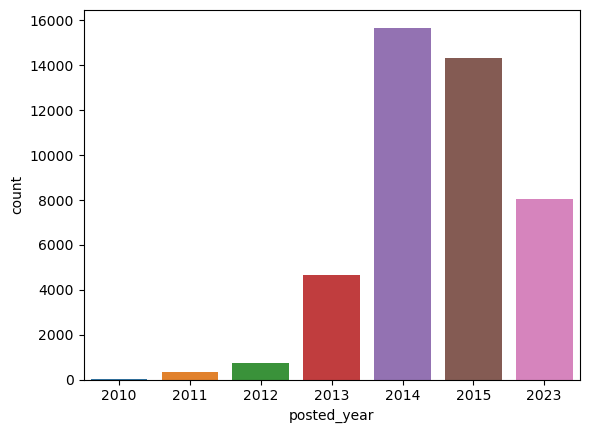

In [26]:
# Continuando con el análisis de las variables numéricas, en este caso los años en que se hicieron reviews de los juegos de video,
# se observa la columna 'posted_year'
print('posted_year =', df['posted_year'].values[5])
print('cantidad =', df[df['posted_year']==2014].count()[0])
print('posted_year =', df['posted_year'].values[11])
print('cantidad =', df[df['posted_year']==2015].count()[0])
sns.countplot(x='posted_year',data=df)
plt.show()

**Cantidades mas sobresalientes de reviews en juegos de video. Es decir, la columna posted_year que contiene los años de esta instancia:**
- *`Muestra 15680 registros para el año 2014, y seguido muy cerca por el año 2015 con 14311 registros`*

release_year = 2017
cantidad = 15684
release_year = 2016
cantidad = 10996


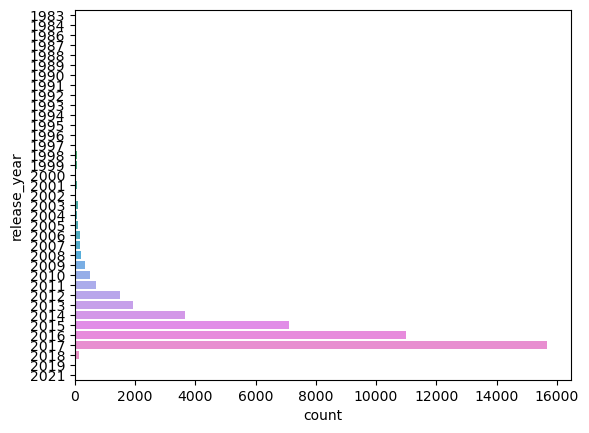

In [27]:
# Ahora mostramos la variable numerica de los años de lanzamiento de los juegos de video
print('release_year =', df['release_year'].values[9])
print('cantidad =', df[df['release_year']==2017].count()[0])
print('release_year =', df['release_year'].values[54])
print('cantidad =', df[df['release_year']==2016].count()[0])
sns.countplot(y='release_year',data=df)
plt.show()

**Juegos mas sobresalientes en años de lanzamiento de uno nuevo. Es decir, la columna release_year que contiene los años de esa instancia:**
- *`Muestra 15684 registros para el año 2017, y en segundo lugar el año 2016 con 10996 registros`*

In [28]:
# En cuanto a correlación, vemos que hay una sobresaliente la que corresponde a: 0.580668
# entre las variables 'id' y 'release_year'
df.corr()

,item_id,playtime_forever,sentiment_analysis,recommend,posted_year,id,release_year,playtime_hours
item_id,1.000000,-0.286916,-0.027781,-0.100182,0.277919,0.018411,0.018280,-0.286916
playtime_forever,-0.286916,1.000000,0.004458,0.054246,-0.007000,0.008889,0.003204,1.000000
sentiment_analysis,-0.027781,0.004458,1.000000,0.107660,-0.033684,0.001286,0.012512,0.004458
recommend,-0.100182,0.054246,0.107660,1.000000,-0.101109,-0.021457,-0.020841,0.054246
posted_year,0.277919,-0.007000,-0.033684,-0.101109,1.000000,0.031976,0.030129,-0.007000
id,0.018411,0.008889,0.001286,-0.021457,0.031976,1.000000,0.580668,0.008889
release_year,0.018280,0.003204,0.012512,-0.020841,0.030129,0.580668,1.000000,0.003204
playtime_hours,-0.286916,1.000000,0.004458,0.054246,-0.007000,0.008889,0.003204,1.000000


Correlación de Pearson = 0.580668


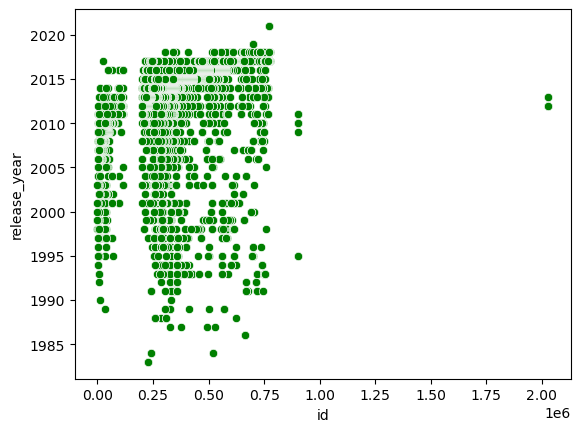

In [29]:
# Así que procedemos a tomar un gráfico, y vemos la correlacion entre las variables mostradas.
print('Correlación de Pearson =',0.580668)
sns.scatterplot(y='release_year',x='id',data=df,color='g')
plt.show()

**Aqui vemos una mancha de puntos concentrada en el primer tercio del marco del gráfico:**
- *`Que efectivamente hay una Correlación de Pearson cercana al 60% entre las variables id y release_year`*

## *`Analizando los datos de mis variables restantes`*

Recomendados = 38926
No Recomendados = 4937


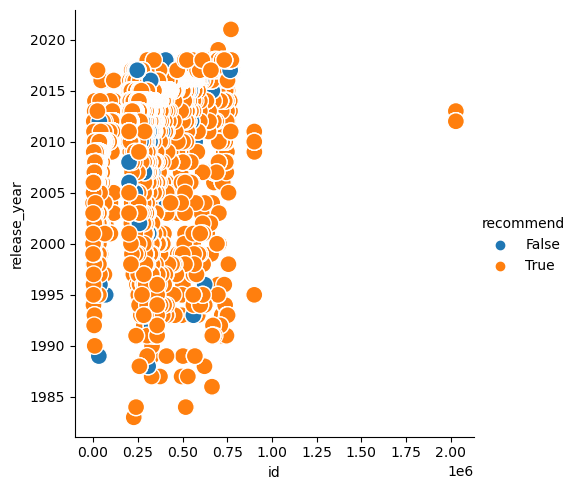

In [30]:
# Retomamos este par de variables correlacionadas para pintarlas de 'True' o 'False',
print('Recomendados =', df[df.recommend==True].count()[0])
print('No Recomendados =', df[df.recommend==False].count()[0])
sns.relplot(x='id',y='release_year',hue='recommend',data=df,s=150)
plt.show()

**Aqui vemos una mancha de puntos concentrada en el primer tercio del marco del gráfico:**
- *`Pero, ahora pintada de True o False donde sobresale True con 38926 registros de juegos recomendados`*

Recomendados = 38926
No Recomendados = 4937


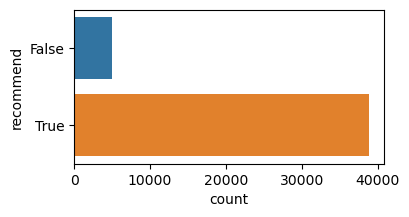

In [31]:
# Aqui podemos ver un acercamiento con los valores de review.recomendados.
print('Recomendados =', df[df.recommend==True].count()[0])
print('No Recomendados =', df[df.recommend==False].count()[0])
plt.figure(figsize=(4,2))
sns.countplot(y='recommend',data=df)
plt.show()

**Aqui tenemos un acercamiento con la columna recommend:**
- *`Y sobresalen los True con 38926 registros, de videos recomendados de un total de 43863 registros`*

## `Cantidad de títulos más recomendados de videojuegos`

Lost Summoner Kitty = 5
Real Pool 3D - Poolians = 5
Ironbound = 4
Battle Royale Trainer = 3


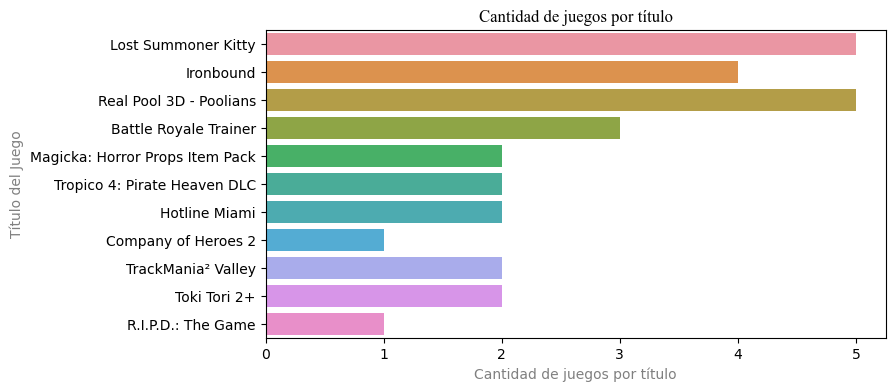

In [32]:
# Vamos a ver, cuales son los titulos más importantes en videojuegos.
titulo = df[df['title'].isin(['Lost Summoner Kitty','Ironbound','Real Pool 3D - Poolians','Simulator','Battle Royale Trainer',
                              'R.I.P.D.: The Game','Toki Tori 2+','Hotline Miami', 'Company of Heroes 2','TrackMania² Valley',
                               'Magicka: Horror Props Item Pack','Tropico 4: Pirate Heaven DLC','Simulator'])]
print('Lost Summoner Kitty =', df[df.title=='Lost Summoner Kitty'].count()[0])
print('Real Pool 3D - Poolians =', df[df.title=='Real Pool 3D - Poolians'].count()[0])
print('Ironbound =', df[df.title=='Ironbound'].count()[0])
print('Battle Royale Trainer =', df[df.title=='Battle Royale Trainer'].count()[0])
plt.figure(figsize=(8,4))
plt.title('Cantidad de juegos por título',fontname='Times New Roman')
sns.countplot(y='title',data=titulo)
plt.ylabel('Título del Juego',color='gray')
plt.xlabel('Cantidad de juegos por título',color='gray')
plt.show()

### Nube de palabras de la columna de titulos de juegos mas recomendados:`title`

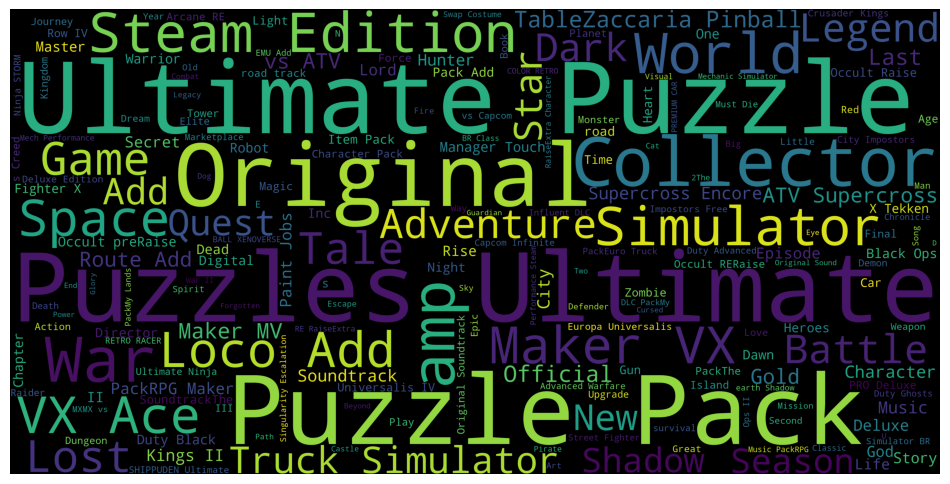

In [33]:
# Creamos variable para 'title', para desplegar palabras que mas se repiten en 'title' o nombres de juegos. 
df['title'] = df['title'].astype('str')
rec_juego_wd = ''.join(df['title'])
rec_juego_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(rec_juego_wd)
plt.figure(figsize=(12,8))
plt.imshow(rec_juego_wc)
plt.axis('off');

**En estos gráficos se muestran los títulos de videojuegos más recomendados.**
- `Los títulos son:` **`Lost Summoner Kitty y Real Pool 3D - Poolians`** que representan 5 registros en cantidad.
- `El título es:` **`Ironbound`** que representa el segundo lugar con 4 registros.
- `El título es:` **`Battle Royale Trainer`** que representa el tercer lugar con 3 registros
> **Las palabras que mas se repiten en titulos recomendados son:**
- *`Ultimate, Puzzles, Puzzle, Pack, Collector, Original`*

### `Ahora analicemos que pasa, con los principales generos de videojuegos`

Indie = 10109
Action = 7378


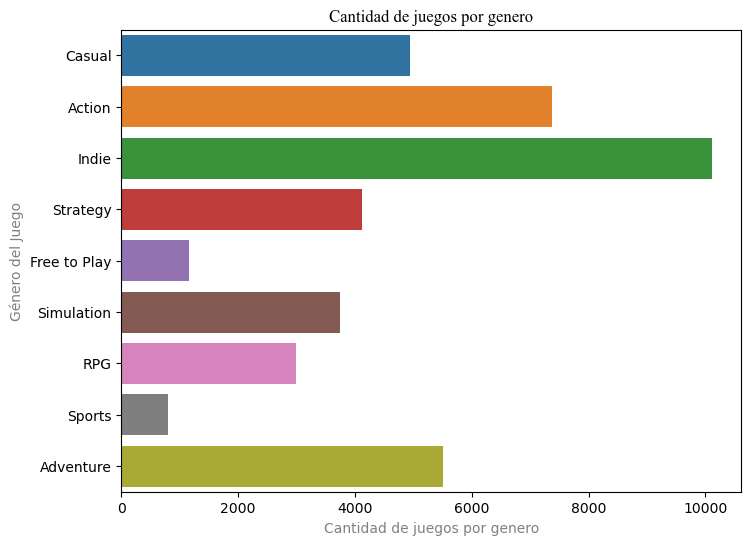

In [34]:
# Vamos a ver, cuales son los géneros más importantes.
genero = df[df['genero'].isin(['Casual','Action','Indie','Strategy','Simulation','Free to Play','Sports','Adventure','RPG'])]
plt.figure(figsize=(8,6))
print('Indie =',genero[genero.genero=='Indie'].count()[0])
print('Action =' ,genero[genero.genero=='Action'].count()[0])
plt.title('Cantidad de juegos por genero',fontname='Times New Roman')
sns.countplot(y='genero',data=genero)
plt.ylabel('Género del Juego',color='gray')
plt.xlabel('Cantidad de juegos por genero',color='gray');

### *Y la nube de palabras de la columna:* `genero`

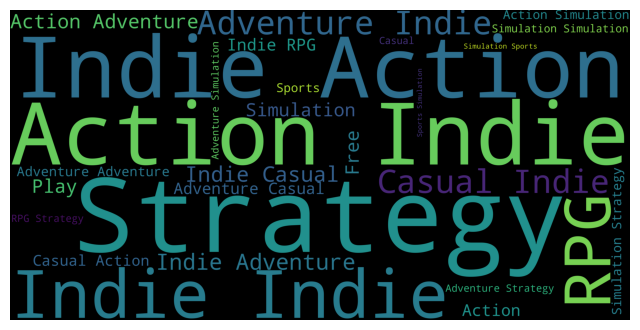

In [35]:
# Esta nube de palabras nos genera los principales géneros.
# Creamos variable para 'genero', para desplegar palabras que mas se repiten en 'genero' de los videojuegos. 
df['genero'] = df['genero'].astype('str')
genero_wd = ' '.join(genero['genero'])
genero_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(genero_wd)
plt.figure(figsize=(8,6))
plt.imshow(genero_wc)
plt.axis('off');

**Analizando los géneros de los videojuegos:**
- *`La primera posición la ocupa Indie con 10109 registros y Action le sigue con 7378 registros`*
> **Con la nube de palabras, nos damos cuenta y constatamos la respuesta de nuestra gráfica anterior:**
- *`Las palabras o géneros que mas se repiten son: Indie y Action`*
- *`Llamando la atención Strategy, que aunque ocupa el quinto lugar en cantidad.`*
- *`Este esta incluido en la lista de generos del juego mas recomendado`*

## `Géneros de los títulos mas recomendados y comentados`

In [36]:
# Identificado el juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_1ra_rec= df[(df.recommend==True)&(df.title=='Lost Summoner Kitty')&(df.id==761140.0)][['genero','sentiment_analysis']]
lista_gen_titulo_1ra_rec

,genero,sentiment_analysis
0,Casual,1
1,Action,1
2,Indie,1
3,Strategy,1
5,Simulation,1


El primer juego más recomendado ubica 5 géneros con sus indices: `Casual[0], Action[1], Indie[2], Strategy[3] y Simulation[5]` con comentarios del segmento `Neutral`. Así, manifestado por la columna de `sentiment_analysis` mediante el código `1`. 

In [37]:
# Identificado el segundo juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_2da_rec = df[(df.recommend==True)&(df.title=='Real Pool 3D - Poolians')&(df.id==670290.0)][['genero','sentiment_analysis']]
lista_gen_titulo_2da_rec

,genero,sentiment_analysis
6,Free to Play,2
7,Indie,2
9,Casual,2
12,Sports,2
16,Simulation,2


El segundo juego más recomendado ubica 5 géneros con sus índices: `Free to Play[6], Indie[7], Casual[9], Sports[12] y Simulation[16]` con comentarios del segmento `Positive`. Así, manifestado por la columna de `sentiment_analysis` mediante el código `2`. 

In [38]:
# Identificado el tercer juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_3era_rec = df[(df.recommend==True)&(df.title=='Ironbound')&(df.id==643980.0)][['genero','sentiment_analysis']]
lista_gen_titulo_3era_rec

,genero,sentiment_analysis
4,Free to Play,1
8,Indie,2
10,Strategy,2
11,RPG,2


El tercer juego más recomendado ubica 4 géneros con sus índices: `Free to Play[4], Indie[8], Strategy[10] y RPG[11]` con comentarios del segmento `Neutral` para el `género:Free to Play` y `Positive` para el resto de `géneros `. Así, manifestado por la columna de `sentiment_analysis` mediante el código `1` y `2` correspondientemente. 

In [39]:
# Identificado el cuarto juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_4ta_rec = df[(df.recommend==True)&(df.title=='Battle Royale Trainer')&(df.id==772540.0)][['genero','sentiment_analysis']]
lista_gen_titulo_4ta_rec

,genero,sentiment_analysis
13,Action,2
17,Adventure,1
20,Simulation,1


El cuarto juego más recomendado ubica 3 géneros con sus índices: `Action[13], Adventure[17] y Simulation[20]` con comentarios del segmento `Positive` para el `género:Action` y `Neutral` para el resto de `géneros `. Así, manifestado por la columna de `sentiment_analysis` mediante el código `2` y `1` respectivamente. 

<h6 align=right><i>Cohorte</i>:DataPT04</h6>
<h6 align=right><i>Mexico - 2023</i></h6>
<h6 align=left><i>Pag. 2</i></h6>